In [0]:
import torch
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib.pyplot as plt  # for showing pictures
%matplotlib inline

### Load Data

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', 
                                        train=True,
                                        download=True, 
                                        transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=128,
                                          shuffle=True, 
                                          num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', 
                                       train=False,
                                       download=True, 
                                       transform=transform)

testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=128,
                                         shuffle=False, 
                                         num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


torch.Size([128, 3, 32, 32])


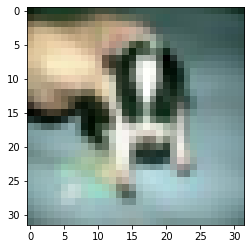

In [3]:
# See random picture
i = np.random.randint(low=0, high=50000)
plt.imshow(trainloader.dataset.data[i], cmap='gray')
print(next(iter(trainloader))[0].shape)

### Building the Model






In [0]:
import torch.nn as nn
import torch.nn.functional as F  # Functional

In [0]:
class MyConvNet(nn.Module):
    def __init__(self):
        # inheritance constructor
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(128)
        self.bn2 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3)
        
        self.fc1 = nn.Linear(6 * 6 * 256, 128)  # data shape after feature extracting layers
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        #(32,32)
        x = F.relu(self.pool(self.bn1(self.conv1(x))))
        x = F.relu(self.pool(self.bn2(self.conv2(x))))

        #print(x.shape)
        x = x.view(-1, 6 * 6 * 256)  # data shape after feature extracting layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

### Model Training

In [0]:
from tqdm import tqdm_notebook
net = MyConvNet()
loss_fn = torch.nn.CrossEntropyLoss()
learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [7]:
for epoch in tqdm_notebook(range(10)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(trainloader)):
        # get current batch
        X_batch, y_batch = batch

        optimizer.zero_grad()

        # forward, backward, optimize
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        # current loss
        running_loss += loss.item()

        # print loss (every 391 batches)
        if i % 391 == 390:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 391))
            running_loss = 0.0

print('Training has finished')

[1,   391] loss: 1.329


[2,   391] loss: 0.988


[3,   391] loss: 0.871


[4,   391] loss: 0.787


[5,   391] loss: 0.723


[6,   391] loss: 0.666


[7,   391] loss: 0.619


[8,   391] loss: 0.563


[9,   391] loss: 0.517


[10,   391] loss: 0.477

Training has finished


### Model Testing

In [8]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)#.view(4, -1))
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

acc = []
for i in range(10):
    acc.append(round(100 * class_correct[i] / class_total[i]))
    #print('Accuracy of %5s : %2d %%' % (classes[i], acc[i]))
    
print(acc)
print(np.mean(acc))

[76, 93, 58, 62, 63, 48, 75, 80, 91, 69]
71.5
